# **Rock.. Paper.. Scissors..**

Now lets prepare the data and get our CNN ready for some action. In this section we will be classifying rocks, papers and scissiors by creating our own CNN model and applying some common preprocessing techniques like **Data Augmentation**.

## Loading important libraries

In [48]:
#Importing some basic modules and Tensorflow
import os
import zipfile
import tensorflow as tf

In [49]:
#ImageDataGenerator is for Data Augmentation
from keras_preprocessing.image import ImageDataGenerator
import keras_preprocessing
from keras_preprocessing import image

In [50]:
#matplotlib for plotting graphs and showing images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Downloading and extracting the data

In [51]:
# Downloading the training and testing zips from hosting site
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-10-12 23:39:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   193MB/s    in 1.0s    

2021-10-12 23:39:16 (193 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-10-12 23:39:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 142.250.152.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘

In [52]:
# Extracting the zips into current directory
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [53]:
# Printing the number of samples in each class
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [54]:
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

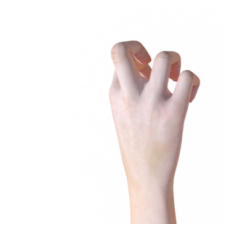

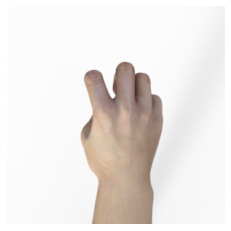

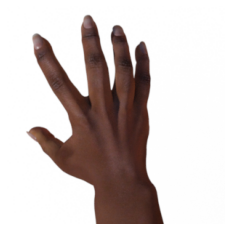

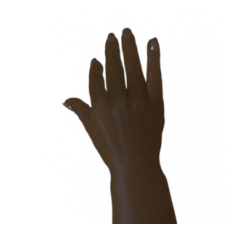

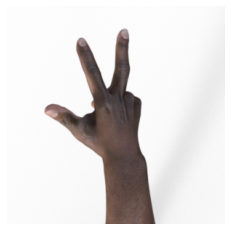

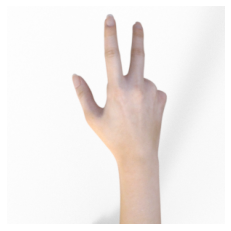

In [55]:
#Running this cell will result in printing of 2 images each from the 3 categories
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# Data Augmentation

*   It is a technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation, cropping, image flips etc.
*   Luckily, we have Tensorflow which enables us to do augment the data while the model is getting trained.
*   All happens without any effort from our side, and each file in the training set gets augmented.





In [56]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
                                      rescale = 1./255,                         # Each pixel value is divided by 255(maximum value of any pixel)
                                      rotation_range=40,                        # Image is rotated randomly in a range of (0 - 40) degrees
                                      width_shift_range=0.2,                    # Width is changed by 20%
                                      height_shift_range=0.2,                   # Height is changed by 20%
                                      shear_range=0.2,                          # Changes orientation of image
                                      zoom_range=0.2,                           # Crops the image by zooming into it by 20%
                                      horizontal_flip=True,                     # Horizontal Flipping is True
                                      fill_mode='nearest'                       # If augmentation results in dead pixels in any image then that is fixed according to pixel values of the 'nearest' neighbours
                                      )

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
                                      TRAINING_DIR,
                                      target_size=(150,150),
                                      class_mode='categorical',                 # Since we have 3 classes
                                      batch_size=126                            # Model will be trained with images of batch size 126
                                      )

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Creating our CNN model

In [57]:
model = tf.keras.models.Sequential([
    # First convolution block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.10),

    # Second convolution block
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.15),

    # Third convolution block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.20),

    # Fourth convolution block
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flattening the results to feed into a Dense NN
    tf.keras.layers.Flatten(),

    # Randomly switching off 50% of neurons for reducing overfitting
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(512, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(3, activation='softmax')
])

In [58]:
# Visualising the structure of our model and printing parameteric info

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)      

In [59]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [60]:
#steps_per_epoch = floor(Number of training images / batch_size)
#validation_steps = floor(Number of validation images / batch_size)

history = model.fit(train_generator, epochs=15, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/15
20/20 [==============================] - 25s 1s/step - loss: 1.2456 - accuracy: 0.3274 - val_loss: 1.0974 - val_accuracy: 0.3333
Epoch 2/15
20/20 [==============================] - 23s 1s/step - loss: 1.1183 - accuracy: 0.3560 - val_loss: 1.1216 - val_accuracy: 0.3333
Epoch 3/15
20/20 [==============================] - 23s 1s/step - loss: 1.1349 - accuracy: 0.3738 - val_loss: 1.0949 - val_accuracy: 0.3333
Epoch 4/15
20/20 [==============================] - 23s 1s/step - loss: 1.1097 - accuracy: 0.4171 - val_loss: 0.9903 - val_accuracy: 0.5591
Epoch 5/15
20/20 [==============================] - 23s 1s/step - loss: 1.0133 - accuracy: 0.5452 - val_loss: 1.0364 - val_accuracy: 0.4677
Epoch 6/15
20/20 [==============================] - 24s 1s/step - loss: 0.9152 - accuracy: 0.5687 - val_loss: 0.7529 - val_accuracy: 0.7930
Epoch 7/15
20/20 [==============================] - 23s 1s/step - loss: 0.6995 - accuracy: 0.7004 - val_loss: 0.5018 - val_accuracy: 0.7554
Epoch 8/15
20/20 [==

In [61]:
# Saving the model for reusing

model.save("rps.h5")

## Visualising the results

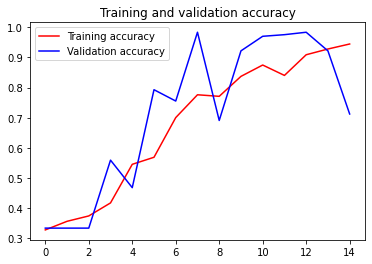

<Figure size 432x288 with 0 Axes>

In [62]:
# Plotting the losses and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Playing and testing the model

In [63]:
# Use this cell to upload your own images to test with the model

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

# **Further Readings**

* [VGG-16](https://arxiv.org/pdf/1409.1556.pdf)
* [ResNet50](https://arxiv.org/pdf/1512.00567v3.pdf)
* [Inceptionv3](https://arxiv.org/pdf/1512.03385v1.pdf)

These are some state of the art models trained over humungous datasets like CIFAR and COCO, and can classify objects into about 1000 classes.
